<a href="https://colab.research.google.com/github/mikealeixogf/modelagem_gravimetrica/blob/main/Anomalia_prisma_Pallero_e_Talwani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Anomalia Gravimétrica computada por Pallero 2015, Telford et. al. 1975.



$$\textbf{g} \equiv \text{g}_j =\gamma \Delta \rho \left[ A \ln \left( \frac{A^2 + D^2}{A^2 + C^2} \right) - B \ln \left( \frac{B^2 + D^2}{B^2 + C^2} \right) - 2C \left( \arctan \left( \frac{A}{C} \right) - \arctan \left( \frac{B}{C} \right) \right) + 2D \left( \arctan \left( \frac{A}{D} \right) - \arctan \left( \frac{B}{D} \right) \right) \right]$$

   $$A = x_p - x_1$$
   $$B = x_p - x_2 $$
  $$C = z_1 $$
   $$D = z_2 $$




[ -0.59135551  -0.67775832  -0.78445727  -0.91829116  -1.08920904
  -1.31210918  -1.61005587  -2.02015735  -2.60485125  -3.47483714
  -4.83897016  -7.12413183 -11.33448731 -21.78734874 -31.6350191
 -33.79501837 -31.6350191  -21.78734874 -11.33448731  -7.12413183
  -4.83897016  -3.47483714  -2.60485125  -2.02015735  -1.61005587
  -1.31210918  -1.08920904  -0.91829116  -0.78445727  -0.67775832
  -0.59135551]


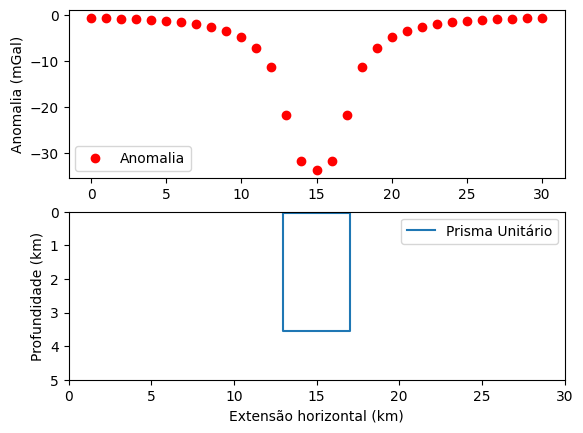

In [17]:
#CALCULO PARA ANOMALIA GRAVIMÉTRICA DE UM ÚNICO PRISMA
import numpy as np
import matplotlib.pyplot as plt

#input
gamma= 6.67 #é a constnte gravitacional
xi=np.linspace(0,30,31) #é a extensão de observação e espaçamento entre as observações

xj= 15 # é o centro do prisma, que é a profundidade.
dj= 0.05 # é a profundidade do prisma
dx= 4 # é a extensão do prisma
t= 3.5 # é a espessura do prisma
deltarho= -0.4 # é o contraste de densidade
v=dx/2 # apenas para facilitar o calculo

#equação do prisma
x1=xj-v;
x2=xj+v;
A=xi-x1;
B=xi-x2;
C= dj;
D= dj+t;
gprisma = gamma*deltarho*(A*np.log((A**2+D**2)/(A**2+C**2)) -
                          B*np.log((B**2+D**2)/ (B**2+C**2))-
                          2*C*(np.arctan(A/C)-np.arctan(B/C))+
                          2*D*(np.arctan(A/D)-np.arctan(B/D)))

print(gprisma)
#Dimensões do Prisma
x3=xj+ (dx/2); # ""         do teceiro "           "
x4=xj- (dx/2); # "           do quarto "           "
x0=xj- (dx/2); # Corecao manual para completar a figura
z1=dj;         # Profundidade de um dos vertices da fita em fumcao de x
z2=dj;
z3=dj+t;
z4=z3;
z0=dj;

hozA=[x1, x2,x3,x4,x0];   #Preparação para plotagem
profB=[z1, z2, z3, z4, z0];

#Plot de figura
plt.figure()
plt.subplot(2,1,1)#duas linhas, uma coluna, posição 1
plt.plot(xi,gprisma,'o', color='r')
plt.ylabel('Anomalia (mGal)')
#plt.xlabel('extensão horizontal (km)')
plt.legend(['Anomalia'])
#_______________________________________________________________________________

plt.subplot(2,1,2)#duas linhas, uma coluna, posição 2
plt.plot(hozA,profB)
plt.ylim(0,5)
plt.xlim(0,30)
plt.gca().invert_yaxis() #comando que invert os eixos.
plt.ylabel('Profundidade (km)')
plt.xlabel('Extensão horizontal (km)')
plt.legend(['Prisma Unitário'])
plt.show() #apresenta a imagem na tela



# A anomalia gravimetrica Talwani et. al 1960

$$gz = 2 G \rho \sum_{i=1}^n Z_i$$
$$$$


$$Z_i = a_{i} sin\phi_{i} cos\phi_{i} \left[ \theta_{i} - \theta_{i+1} + tan\phi_{i} ln \dfrac{cos\theta_{i}(tan\theta_{i} - tan\phi_{i})}{cos\theta_{i+1}(tan\theta_{i+1} - tan\phi_{i})}\right]$$



\

$$X_i = a_{i} sin\phi_{i} cos\phi_{i} \left[ tan\phi_i(\theta_{i+1} - \theta_{i}) + ln \dfrac{cos\theta_{i}(tan\theta_{i} - tan\phi_{i})}{cos\theta_{i+1}(tan\theta_{i+1} - tan\phi_{i})}\right]$$
\
$$\text{onde}$$
\
$$\theta_{i} = tan^{-1} \dfrac{z_i}{x_i}$$
\
$$\phi_{i} = tan^{-1} \dfrac{z_{i+1} -z_i}{x_{i+1} - x_i}$$
\
$$\theta_{i} = tan^{-1} \dfrac{z_{i+1}}{x_{i+1}}$$
\
  $$\text{e}$$
  \
  $$a_{i} = x_{i+1} + z_{i+1} \dfrac{x_{i+1} - x_i}{z_{i} - z_{i+1} }$$

  ## Caso A

  $$\text{se} \ \ \ \ x_i = 0 $$
$$Z_i= - a_{i} sin\phi_{i} cos\phi_{i} \left[ \theta_{i+1} - \dfrac{\pi}{2} + tan\phi_{i} \ln (cos\theta_{i+1}(tan\theta_{i+1} - tan\phi_{i}))\right]$$


$$X_i= a_{i} sin\phi_{i} cos\phi_{i} \left[ tan\phi_i(\theta_{i+1} - \dfrac{\pi}{2}) +  \ln (cos\theta_{i+1}(tan\theta_{i+1} - tan\phi_{i}))\right]$$

## Caso B

$$\text{se} \ \ \ \ x_{i+1} = 0 $$
$$Z_i= a_{i} sin\phi_{i} cos\phi_{i} \left[ \theta_{i} - \dfrac{\pi}{2} + tan\phi_{i} \ln (cos\theta_{i}(tan\theta_{i} - tan\phi_{i}))\right]$$


 $$X_i= - a_{i} sin\phi_{i} cos\phi_{i} \left[ tan\phi_i(\theta_{i} - \dfrac{\pi}{2}) +  \ln (cos\theta_{i}(tan\theta_{i} - tan\phi_{i}))\right]$$
##Caso C
$$\text{se} \ \ \ \ z_i = z_{i+1} $$

$$Z_i = z_i(\theta_{i+1} - \theta_i$$
$$X_i = z_i \ln{\dfrac{sin\theta_{i+1}}{sin\theta_i}}$$
## Caso D

$$\text{se} \ \ \ \ x_i = x_{i+1} $$

$$Z_i = x_i \ln{\dfrac{cos\theta_{i}}{cos\theta_{i+1}}}$$
$$X_i =x_i(\theta_{i+1} - \theta_i) $$


# Caso E
$$\text{se} \ \ \ \ \theta_i = \theta_{i+1} $$

$$Z_i = 0$$
$$X_i = 0$$

## Caso F

$$\text{se} \ \ \ \ x_i = z_{i}=0 $$
$$Z_i = 0$$
$$X_i = 0$$

## Caso G

$$\text{se} \ \ \ \ x_{i+1} = z_{i+1}=0 $$
$$Z_i = 0$$
$$X_i = 0$$

[ -0.65966044  -3.06542517  -4.49971956  -5.4051119   -5.69127544
  -5.85730509  -6.0467034   -6.33876416  -6.95677133  -9.05994316
 -11.71059977 -12.66111602 -13.16015765 -13.60044152 -14.15754228
 -15.06507024 -16.78872067 -19.32161253 -21.15896113 -22.12968588
 -22.65724863 -22.96777548 -23.16050188 -23.28138903 -23.35316635
 -23.38718881 -23.38828429 -23.35655404 -23.28740824 -23.16986097
 -22.9818786  -22.67900415 -22.16552598 -21.22252148 -19.42000042
 -16.81986812 -14.98874021 -14.0420181  -13.48623313 -13.08358155
 -12.69740877 -12.13763918 -10.74303174  -7.90803355  -6.81735827
  -6.43200822  -6.23097887  -6.10381862  -6.01456916  -5.94998927
  -5.91496509  -5.90326848  -5.89678692  -5.8863372   -5.85291741
  -5.6995283   -5.31297008  -4.48316188  -2.82733918  -0.50599052]


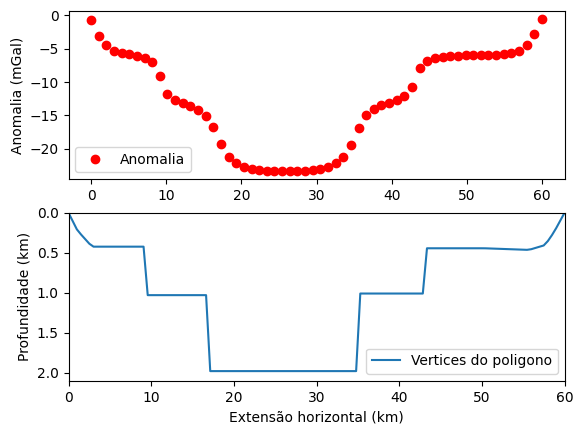

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Função para carregar dados de um arquivo txt
def carregar_dados(arquivo):
    return np.loadtxt(arquivo)

# Função de cálculo da anomalia gravitacional de Talwani
def talwani_gravity(density_contrast, n_sides, n_stat, x_start, z_start, x_obs, z_obs):
    gamma = 6.67259  # Constante gravitacional em unidades do SI (m³⋅kg⁻¹⋅s⁻²)
    gz = np.zeros(n_stat, dtype=np.float64)  # Inicializando o vetor de anomalia com precisão dupla

    # Alocar memória com precisão
    x = np.zeros(n_sides + 1, dtype=np.float64)
    z = np.zeros(n_sides + 1, dtype=np.float64)

    # Função para determinar o sinal do polígono (usada no Talwani)
    def lusense(nv, xv, zv):
        area = 0.0
        eps = 1.E-05
        for j in range(1, nv - 1):
            area += (xv[j] - xv[0]) * (zv[j + 1] - zv[0]) - (xv[j + 1] - xv[0]) * (zv[j] - zv[0])
        if abs(area) <= eps:
            print("Polígono muito fino!")
        return np.sign(area)

    isign = lusense(n_sides, x_start, z_start)
    pi = np.pi
    ct = isign * 2 * gamma * density_contrast

    for n in range(n_stat):
        gz[n] = 0.0
        for i in range(n_sides):
            z[i] = z_start[i] + z_obs
            x[i] = x_start[i] - x_obs[n]

        z[n_sides] = z[0]
        x[n_sides] = x[0]

        for i in range(n_sides):
            if x[i] == 0.0 and z[i] == 0.0:
                z[i] = 1E-10  # Evitar divisão por zero
            diffz = z[i + 1] - z[i]
            diffx = x[i + 1] - x[i]
            diffz2 = diffz * diffz
            diffx2 = diffx * diffx
            if z[i] == 0.0 and x[i] == 0.0:
                theta = 0.0
            else:
                theta = np.arctan2(z[i], x[i])

            if z[i + 1] == 0.0 and x[i + 1] == 0.0:
                theta1 = 0.0
            else:
                theta1 = np.arctan2(z[i + 1], x[i + 1])

            d = theta - theta1
            if d > pi:
                diffth = d - 2.0 * pi
            elif d < -pi:
                diffth = d + 2.0 * pi
            else:
                diffth = d

            a = (x[i] * z[i + 1] - z[i] * x[i + 1]) / (diffz2 + diffx2)
            b = diffx * diffth
            c = (x[i + 1]**2 + z[i + 1]**2) / (x[i]**2 + z[i]**2)
            if c == 0.0:
                d = 0.0
            else:
                d = 0.5 * diffz * np.log(c)

            delg = a * (b + d)
            gz[n] += ct * delg

    return gz

# Carregar dados do arquivo de texto
dados = carregar_dados('RELEVO_VERD.TXT')

# Extraindo x e z das observações
x_start = dados[:, 0]  # Primeira coluna (x)
z_start = dados[:, 1]  # Segunda coluna (z)

# Parâmetros de entrada
density_contrast = -0.3  # Contraste de densidade (g/cm³)
n_sides = len(x_start) - 1
n_stat = 60  # Número fixo de observações (alterado diretamente aqui)
x_obs = np.linspace(min(x_start), max(x_start), n_stat)  # Distribuir as observações uniformemente no intervalo de x_start
z_obs = 0.005  # Altitude comum das estações

# Calcular a anomalia
gz = talwani_gravity(density_contrast, n_sides, n_stat, x_start, z_start, x_obs, z_obs)

# Exibir resultados
print(gz)

# Plotando os gráficos
fig = plt.figure()

plt.subplot(2, 1, 1)  # duas linhas, uma coluna, posição 1
plt.plot(x_obs, gz, 'o', color='r')
plt.ylabel('Anomalia (mGal)')
plt.legend(['Anomalia'])

plt.subplot(2, 1, 2)  # duas linhas, uma coluna, posição 2
plt.plot(x_start, z_start)
plt.ylim(0, 2.1)
plt.xlim(0, 60)
plt.gca().invert_yaxis()  # Inverter o eixo Y para profundidade crescente para baixo
plt.ylabel('Profundidade (km)')
plt.xlabel('Extensão horizontal (km)')
plt.legend(['Vertices do poligono'])

plt.show()


[ -1.08755893  -3.68630063  -4.91548741  -5.72818508  -5.94427172
  -6.14777955  -6.40104102  -6.63638393  -7.27916447  -9.27779271
 -11.94976823 -12.90138575 -13.40166172 -13.85571597 -14.40690766
 -15.27557921 -16.89482077 -19.35124718 -21.25370921 -22.27008017
 -22.81408779 -23.1257324  -23.31525354 -23.43346614 -23.50354135
 -23.53161202 -23.52082186 -23.47541094 -23.39558645 -23.26562704
 -23.08595213 -22.80543983 -22.29484747 -21.33210226 -19.48753694
 -16.96885457 -15.23408383 -14.25818485 -13.69135388 -13.31823319
 -12.9702909  -12.43177212 -11.0288845   -8.24022655  -7.10677317
  -6.71305929  -6.554466    -6.39968323  -6.35568101  -6.2886002
  -6.27475946  -6.23449904  -6.27144955  -6.25491369  -6.16894133
  -5.9365219   -5.63002725  -4.81784887  -3.25816571  -0.81460095]


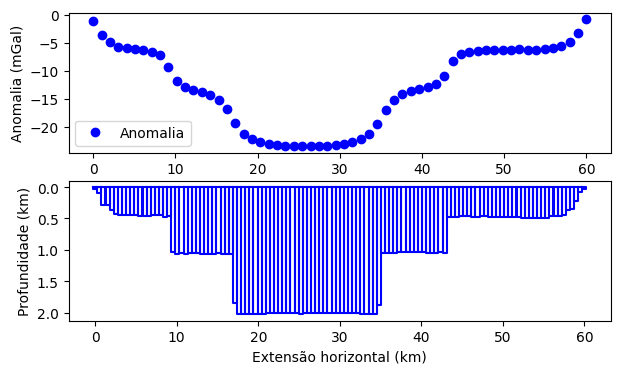

In [18]:
#EXPANDINDO PARA UM CONJUNTO DE PRISMAS

import numpy as np
import matplotlib.pyplot as plt

#CRIANDO FUNÇÕES
#FUNÇÃO DE CARREGAMENTO DOS DADOS EM ARQUIVO TXT
def carregar_dados(arquivo):
  return np.loadtxt(arquivo)




#FUNÇÃO CÁLCULO DE ANOMALIA GRAVIMÉTRICA

def anomalia_grav(dados, gamma, deltarho,xi,dj,dx):
  xj= dados[:,0] # é o centro do prisma, que é a profundidade.
  t= dados[:,1]
  gprisma=0
  for i in range(len(xj)):
    v=dx/2
    x1=xj[i]-v
    x2=xj[i]+v;
    A=xi-x1;
    B=xi-x2;
    C= dj;
    D= dj+t[i];
    gprisma += gamma*deltarho*(A*np.log((A**2+D**2)/(A**2+C**2)) -
                             B*np.log((B**2+D**2)/ (B**2+C**2))-
                             2*C*(np.arctan(A/C)-np.arctan(B/C))+
                             2*D*(np.arctan(A/D)-np.arctan(B/D)))
  return gprisma


#FUNÇÃO CÁLCULO DOS VÉRTICES DOS PRISMAS

def vertices(dados,dj,dx):
  listah=[]
  listaz=[]
  xj= dados[:,0] # é o centro do prisma, que é a profundidade.
  t= dados[:,1]
#Dimensões do Prisma
  for i in range(len(xj)):
    v=dx/2
    x1=xj[i]- v; # Coordenada do primeiro vertice; em função de x
    x2=xj[i]+ v; # Cooedenada do segundo vertice; em função de x
    x3=xj[i]+ v; # ""         do teceiro "           "
    x4=xj[i]- v; # "           do quarto "           "
    h=[x1,x2,x3,x4,x1]
    listah.append(h)

  for j in range(len(t)):
    z1=dj;         # Profundidade de um dos vertices da fita em fumcao de x
    z2=dj;
    z3=dj+t[j];
    z4=z3;
    z=[z1,z2,z3,z4,z1]
    listaz.append(z)
  return listah, listaz


def plotar_resultados(xi, gprisma, listah, listaz):
    plt.figure(figsize=(7, 4))

    plt.subplot(2, 1, 1)
    plt.plot(xi, gprisma, 'o', color='b')
    plt.ylabel('Anomalia (mGal)')
    plt.legend(['Anomalia'])

    plt.subplot(2, 1, 2)
    for i in range(len(listah)):
        plt.plot(listah[i], listaz[i], color='blue')
    plt.gca().invert_yaxis()
    plt.ylabel('Profundidade (km)')
    plt.xlabel('Extensão horizontal (km)')

    plt.show()

gamma= 6.67259 #é a constnte gravitacional
xi=np.linspace(0,60,60) #é a extensão de observação e espaçamento entre as observações
dx= 0.5 # é a extensão do prisma
dj= 0.001 #é a profundidade do prisma
deltarho= -0.3 # é o contraste de densidade

dados=carregar_dados('RELEVO_EST.TXT')
gprisma=anomalia_grav(dados,gamma,deltarho,xi,dj,dx)
print(gprisma)
listah,listaz=vertices(dados,dj,dx)
plotar_resultados(xi,gprisma,listah,listaz)
#equação do prisma


In [19]:
#Cálculo do RMSE

import numpy as np

# Valores observados (reais) e calculados
observados = np.array(gz)
calculados = np.array(gprisma)

# Cálculo do RMSE
rmse = np.sqrt(np.mean((observados - calculados)**2))
rmse


0.2685859609161345

ESTE RMSE É DIFERENTE PARA AS ANOMALIAS CALCULADAS PARA O MESMO PONTO, MESMAS PROFUNDIDADES COM OS MESMOS MÉTODOS, DEVIDO A LINGUAGEM DE PROGRAMAÇÃO SER DIFERENTE DA LINGUAGEM FORTRAN, QUE É MUITO MELHOR PARA FAZER CÁLCULOS NÚMERICOS